In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from statsmodels.discrete.discrete_model import Logit 
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from  sklearn.metrics import recall_score
from scipy import stats
import warnings
warnings.filterwarnings(action='once')
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import  roc_curve
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier

C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [2]:
data=pd.read_csv("Employee_attrition.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [4]:
print(data.isna().any().any())
data.info()## there is no NA

False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome   

In [5]:
del data['EmployeeNumber'] # as it is unnecessary data

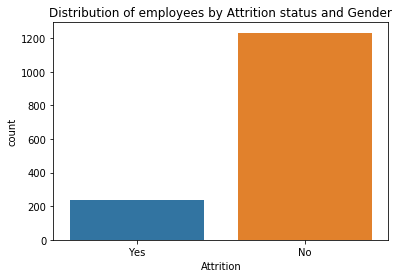

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64


In [6]:
sns.countplot(x="Attrition",data=data)
plt.title("Distribution of employees by Attrition status and Gender")
plt.show()
#let's see percenatage of customers who didn't subscribe to term deposit,
#and percenatage of customers who subscribed to term deposit
print(data.Attrition.value_counts()/len(data)*100)

#### <p1>as we see our benchmark is about 84 percent our model should predict more precisely</p1>

In [7]:
df_num=data.select_dtypes(exclude="object")## we divide data in this groups to check variance, 
df_object=data.select_dtypes(include="object")#if there is exict a column containing only one value
for i in df_num:
    if df_num[i].var()==0:
        del df_num[i]
cols_should_dropped=[i for i in df_object.columns if len(df_object[i].unique())==1]
df_object=df_object.drop(columns=cols_should_dropped)

## Plot the boxplots and Histograms for all numeric variables 


C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


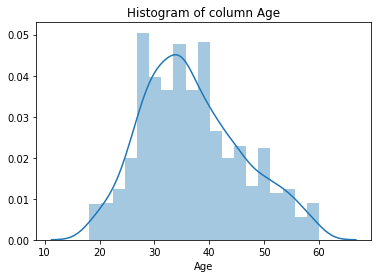

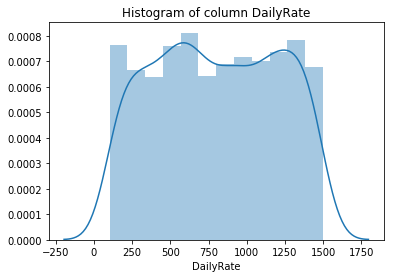

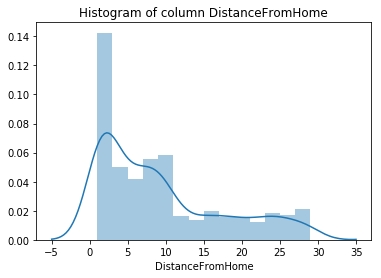

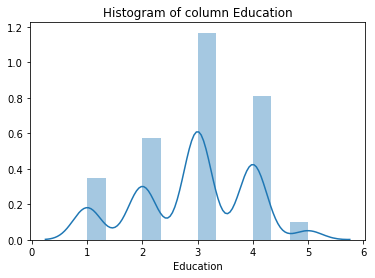

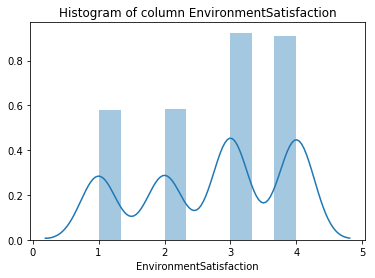

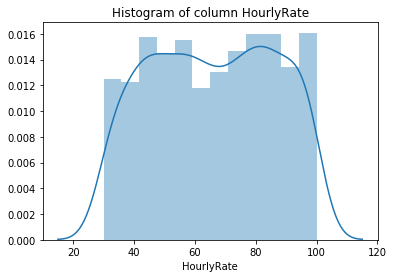

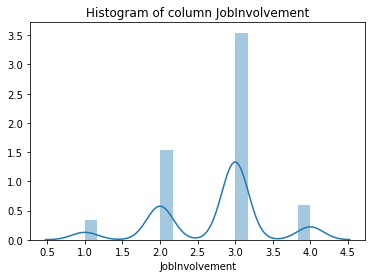

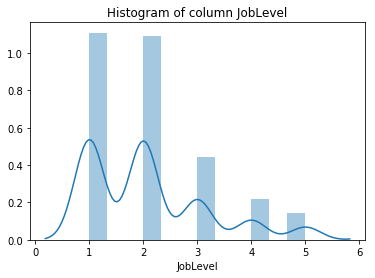

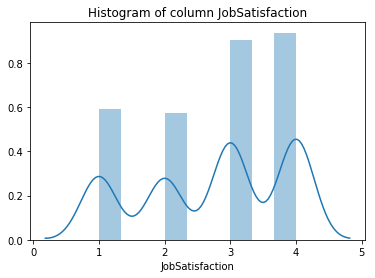

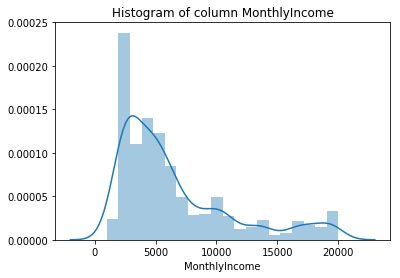

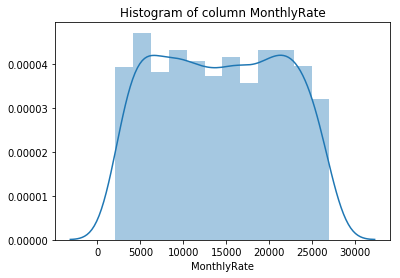

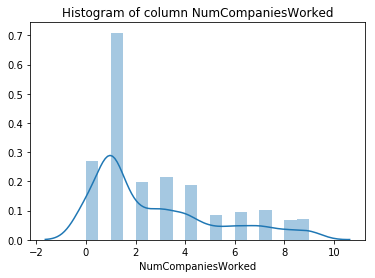

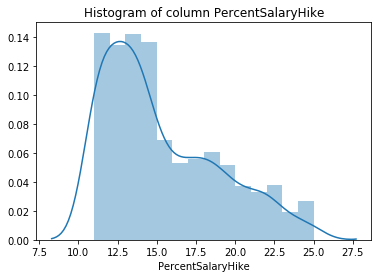

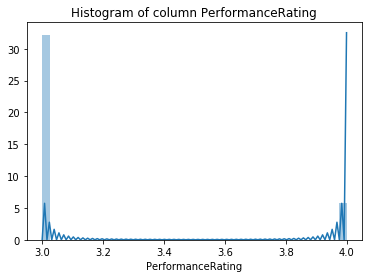

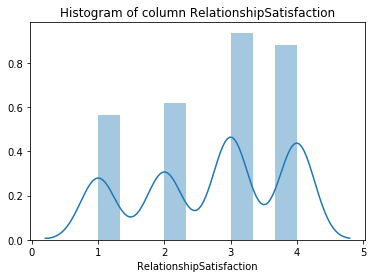

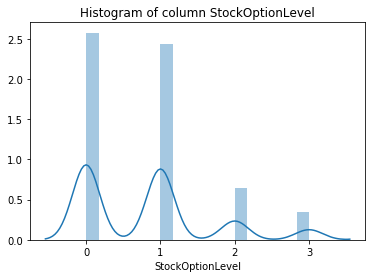

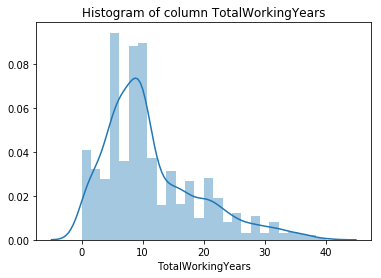

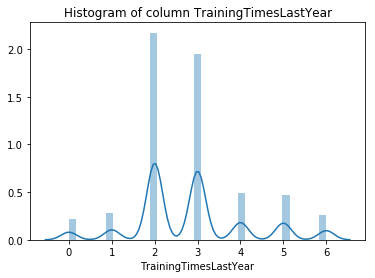

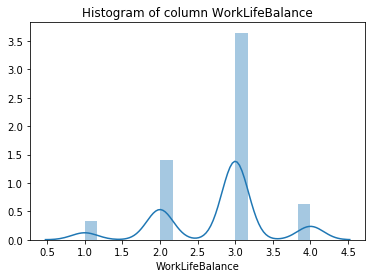

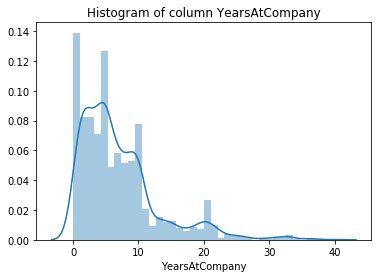

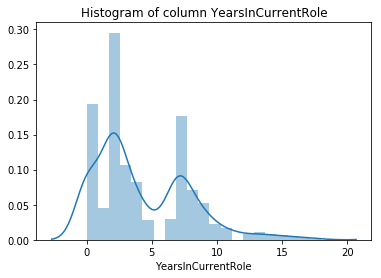

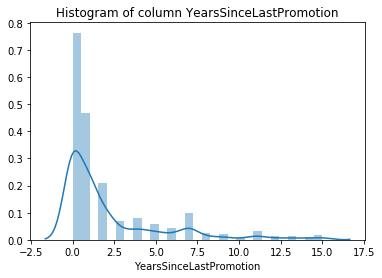

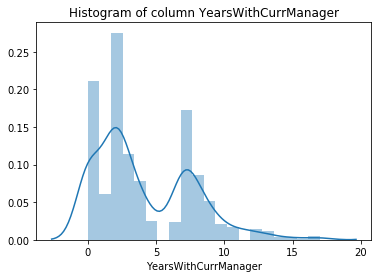

In [8]:
for i in df_num:
        sns.distplot(df_num[i],norm_hist=True)
        plt.title("Histogram of column %s"% i)
        plt.show()

<p>It seemed only age was normally distributed</p>

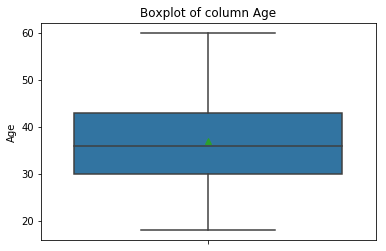

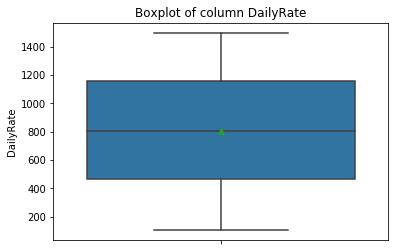

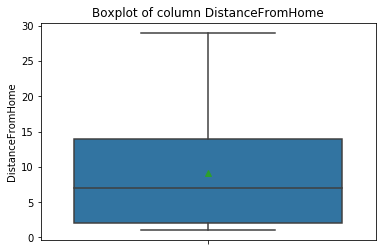

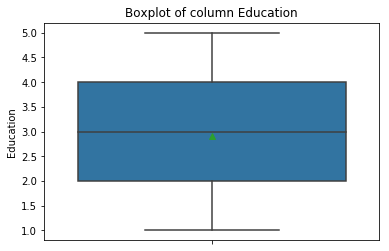

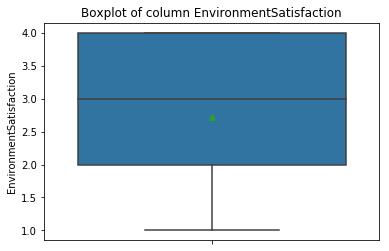

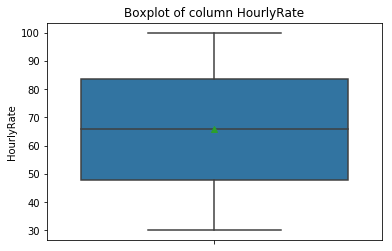

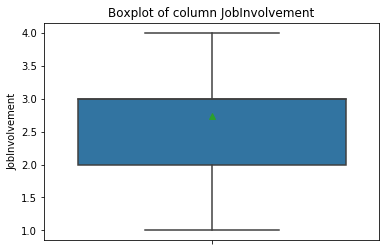

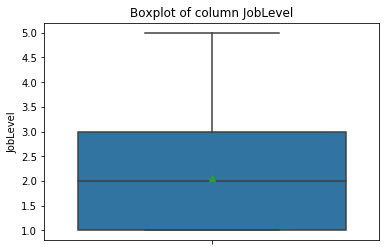

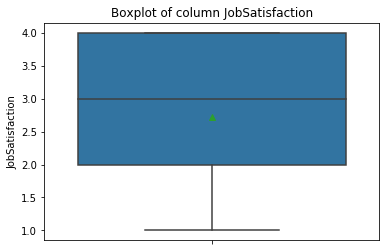

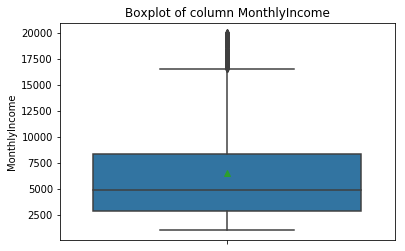

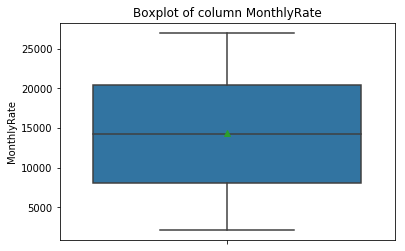

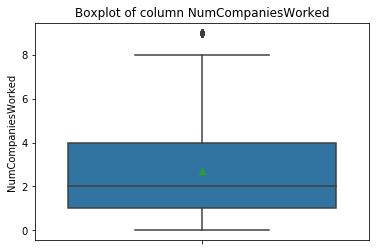

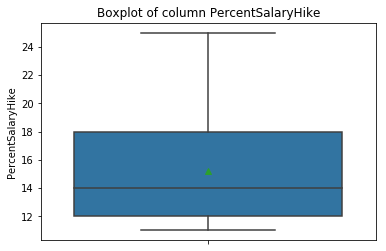

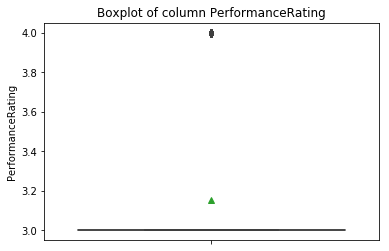

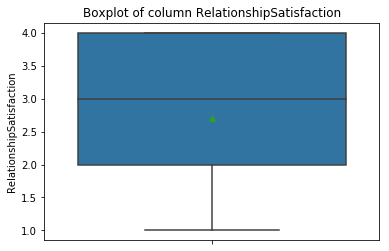

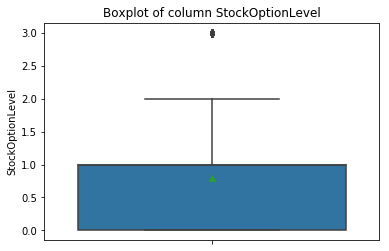

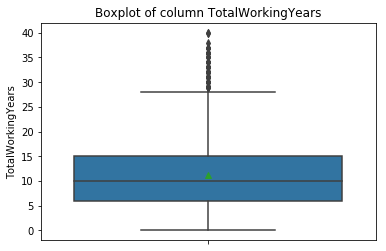

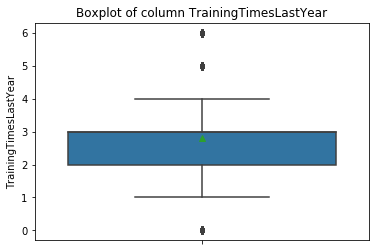

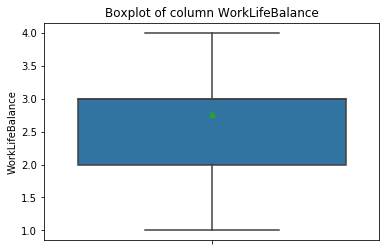

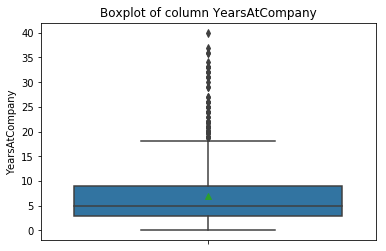

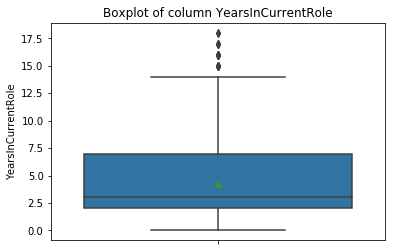

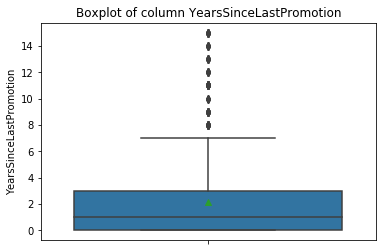

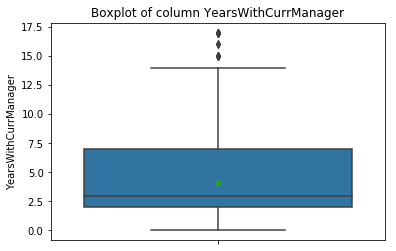

In [9]:
for i in df_num:
    sns.boxplot(data=df_num,y=i,showmeans=True,fliersize=5)
    plt.title("Boxplot of column %s"% i)
    plt.show()


In [10]:
z=df_num.copy() ## now lets count number of outliers in each column####
Q1 = z.quantile(0.25)
Q3 = z.quantile(0.75)
IQR = Q3 - Q1
((z < (Q1 - 1.5 * IQR)) | (z > (Q3 + 1.5 * IQR))).sum()
mask = (z < (Q1 - 1.5 * IQR)) | (z > (Q3 + 1.5 * IQR))
z[mask] = np.nan
z.dropna().shape

(779, 23)

In [11]:
df_num.shape##

(1470, 23)

<h3> we cannot drop observations with outliers as it will cut our dataframe approximately in half, but we can decrease number of outliers by using Now lets use winsorization, it is a transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers, it replace otuliers by max or min depending on which critical region the outlier is.</h3>

In [12]:
## now lets count number of outliers in each columns
Q1 = df_num.quantile(0.25)#############
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).sum()

Age                           0
DailyRate                     0
DistanceFromHome              0
Education                     0
EnvironmentSatisfaction       0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobSatisfaction               0
MonthlyIncome               114
MonthlyRate                   0
NumCompaniesWorked           52
PercentSalaryHike             0
PerformanceRating           226
RelationshipSatisfaction      0
StockOptionLevel             85
TotalWorkingYears            63
TrainingTimesLastYear       238
WorkLifeBalance               0
YearsAtCompany              104
YearsInCurrentRole           21
YearsSinceLastPromotion     107
YearsWithCurrManager         14
dtype: int64

In [13]:
df_num.PerformanceRating.value_counts()## we will not correct this outlier 
#as there is only two unique numbers and the one which is outlier is more than 10 percent of our data

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [14]:
colums_with_outliers=((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).sum().drop("PerformanceRating")
colums_with_outliers=colums_with_outliers[colums_with_outliers>0].index.tolist()
colums_with_outliers##we do this to have names of columns where we have outliers

['MonthlyIncome',
 'NumCompaniesWorked',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [15]:
print(df_num[colums_with_outliers].describe())

       MonthlyIncome  NumCompaniesWorked  StockOptionLevel  TotalWorkingYears  \
count    1470.000000         1470.000000       1470.000000        1470.000000   
mean     6502.931293            2.693197          0.793878          11.279592   
std      4707.956783            2.498009          0.852077           7.780782   
min      1009.000000            0.000000          0.000000           0.000000   
25%      2911.000000            1.000000          0.000000           6.000000   
50%      4919.000000            2.000000          1.000000          10.000000   
75%      8379.000000            4.000000          1.000000          15.000000   
max     19999.000000            9.000000          3.000000          40.000000   

       TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
count            1470.000000     1470.000000         1470.000000   
mean                2.799320        7.008163            4.229252   
std                 1.289271        6.126525            3.623137  

In [16]:
corrected=df_num.copy()

In [17]:
for i in  colums_with_outliers:
    corrected[i]=stats.mstats.winsorize(np.array(df_num[i]),inplace=True,limits=0.05)

In [18]:
corrected[colums_with_outliers].describe()

MonthlyIncome  NumCompaniesWorked  StockOptionLevel  TotalWorkingYears  \
count    1470.000000         1470.000000       1470.000000        1470.000000   
mean     6456.480952            2.657823          0.793878          11.089116   
std      4526.003557            2.414062          0.852077           7.242344   
min      2097.000000            0.000000          0.000000           1.000000   
25%      2911.000000            1.000000          0.000000           6.000000   
50%      4919.000000            2.000000          1.000000          10.000000   
75%      8379.000000            4.000000          1.000000          15.000000   
max     17856.000000            8.000000          3.000000          28.000000   

       TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
count            1470.000000     1470.000000         1470.000000   
mean                2.791837        6.781633            4.109524   
std                 1.119875        5.274294            3.317688   
min                 1.000000        1.000000            0.000000   
25%                 2.000000        3.000000            2.000000   
50%                 3.000000        5.000000            3.000000   
75%                 3.000000        9.000000            7.000000   
max                 5.000000       20.000000           11.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.019728              3.982993  
std                   2.711751              3.239117  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                   9.000000             10.000000

<h2>As we see now we have different max and min values in each column</h2>
<p> In order to udnerstand wheather outliears are randomly distributed by Attrition groups[Yes,No] or are they specific to one of them I will temporary join Attrition column to numeric dataframe</p>

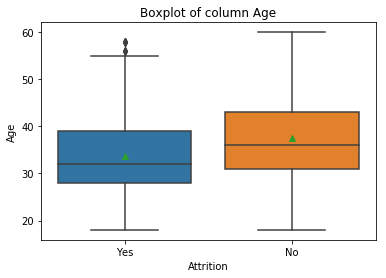

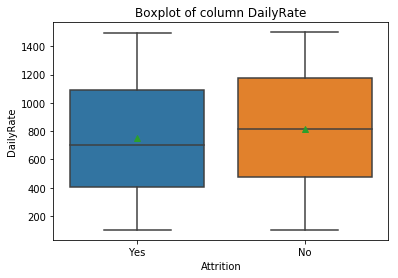

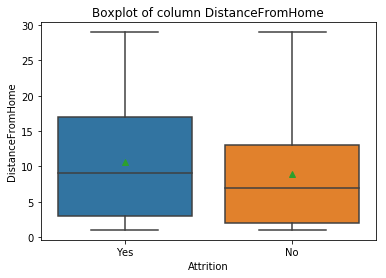

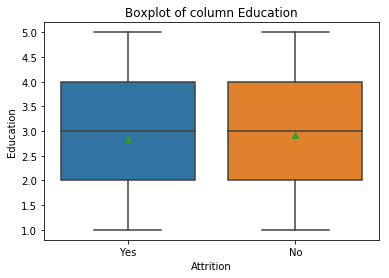

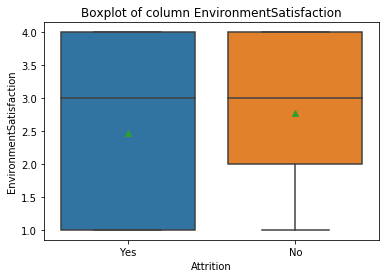

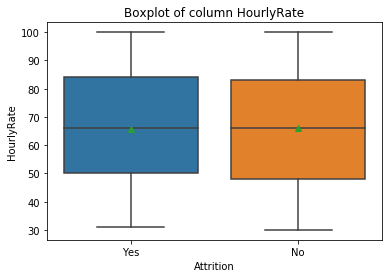

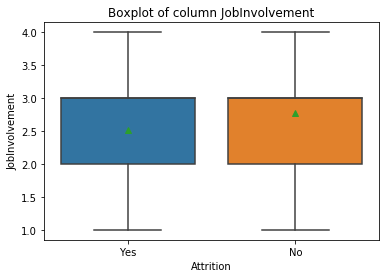

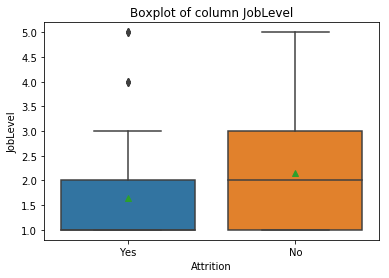

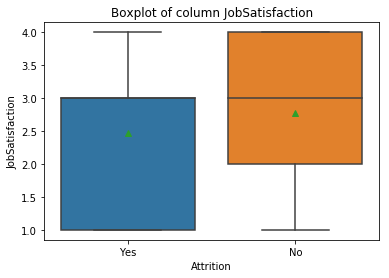

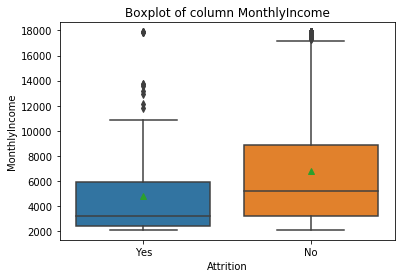

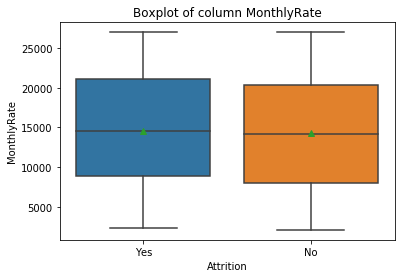

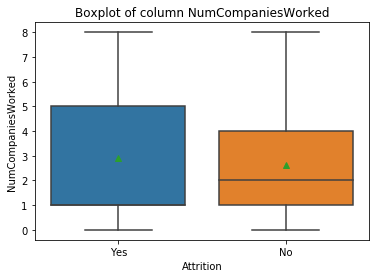

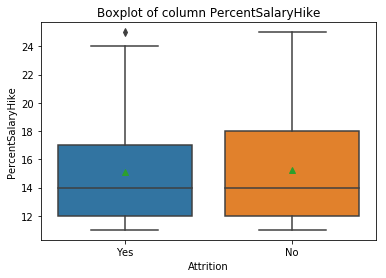

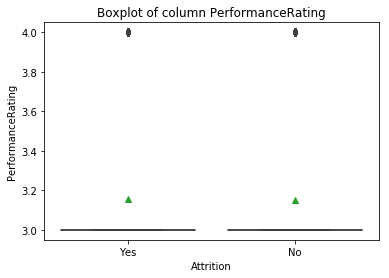

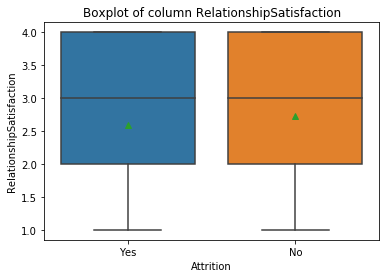

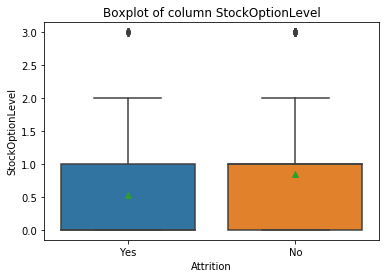

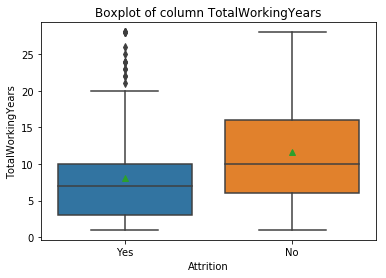

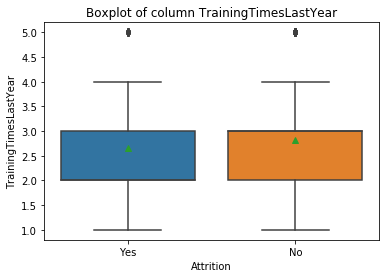

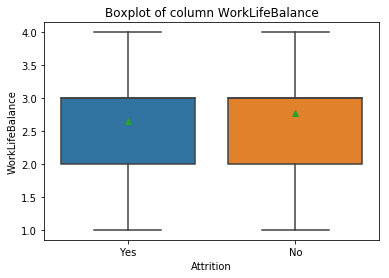

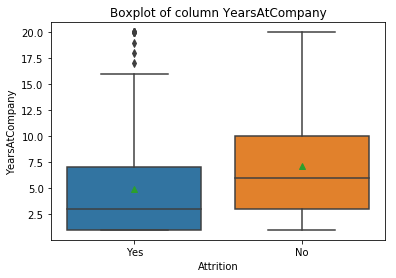

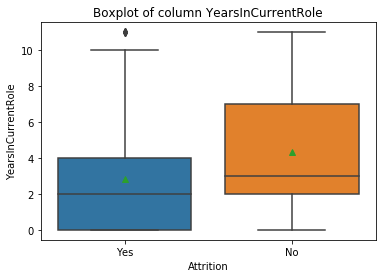

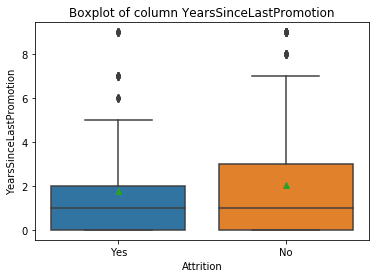

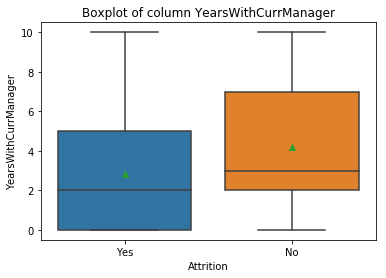

In [19]:
dat_box=corrected.join(df_object.Attrition)
for i in dat_box:
    if i!="Attrition":
        sns.boxplot(y=i,x=dat_box["Attrition"],showmeans=True,data=dat_box,fliersize=5)
        plt.title("Boxplot of column %s"% i)
        plt.show()

<h3>Fortunately there were only two cases where we have outliers only for one group One of them is Monthly Income where difference is noticable. But As I do not want to decrease number of ovservations where Attrition is YES we will leave them untouched.<br> 

#  Logistic regression
<h3> From now  I will develop two models one with outliers the other without to check how if effects the models</h3>
<p> The benchmark is as we saw is about 84 </p>

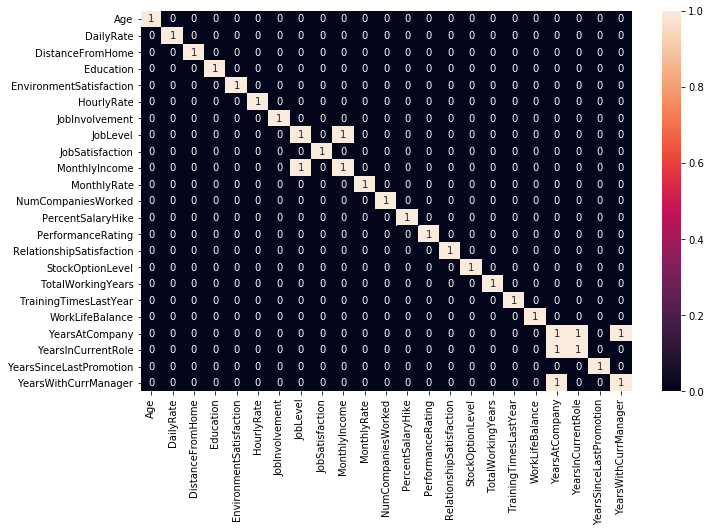

In [20]:
plt.figure(figsize=(11,7))
sns.heatmap(corrected.corr().abs().round(2)>0.8,annot=True)
plt.show()

<h4>As we see we have highly correlated variabe monthly income and job level I will drop joblevel to keep variables independet</h4>

In [21]:
corrected1=corrected.drop(["YearsAtCompany","JobLevel"],axis=1)

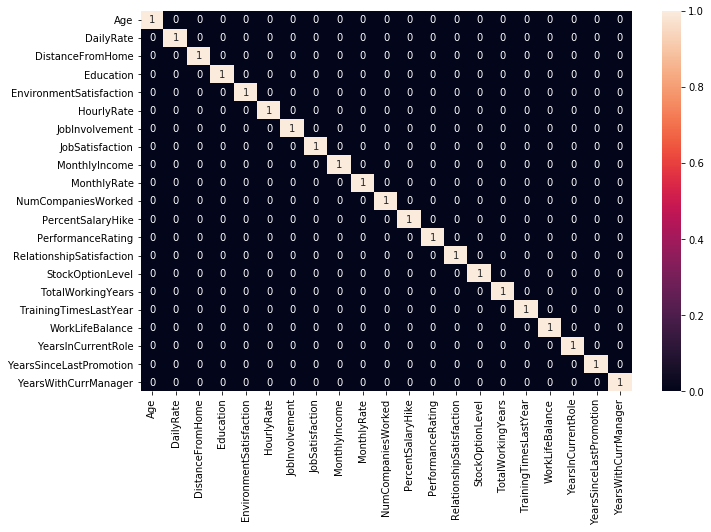

In [22]:
plt.figure(figsize=(11,7))
sns.heatmap(corrected1.corr().abs().round(2)>0.8,annot=True)
plt.show()

# Logit 1- With data with outliers and joblevel

In [23]:
### lets create dummies from object variables and final data
df_dummies=pd.get_dummies(df_object,prefix=df_object.columns,drop_first=True)
data1=df_num.join(df_dummies)
Y1=data1.Attrition_Yes
X1=data1.drop("Attrition_Yes",axis=1)
grid1=GridSearchCV(LogisticRegression(random_state=42,class_weight="balanced"),param_grid={"C":np.linspace(0.0001,1,25),"penalty":
          M                                                                                      ["l1","l2"]},scoring="roc_auc",cv=5,n_jobs=-1)
grid1.fit(X1,Y1)
params=list(grid1.best_params_.values())
C,Penalty=params
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.25,random_state=42)
logit1=LogisticRegression(random_state=42,C=C,penalty=Penalty,class_weight='balanced').fit(x_train,y_train)

train_score=logit1.score(x_train,y_train)
test_score=logit1.score(x_test,y_test)
print(grid1.best_params_)
print("Train score is %s and Test score is%s"%(train_score,test_score))
print("cross_validation score is %s"% (np.mean(cross_val_score(LogisticRegression(random_state=42,C=C,penalty=Penalty,class_weight='balanced'),X1,Y1,cv=5))))
y_pred=logit1.predict(x_test)
y_pred2=logit1.predict(x_train)
print(classification_report(y_test,logit1.predict(x_test)))
print("roc_auc: for test is",roc_auc_score(y_test,y_pred))
print("roc_auc: for train is",roc_auc_score(y_train,y_pred2))
print("average Roc_score is",grid1.best_score_)
print("recall for train",recall_score(y_train,y_pred2))
print("recall for test",recall_score(y_test,y_pred))
#ROC curve
FPR,TPR,tresholds=roc_curve(y_test,logit1.predict_proba(x_test)[:,1])
plt.plot(FPR,TPR,label="ROC AUC=%f"%roc_auc_score(y_test,y_pred))
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


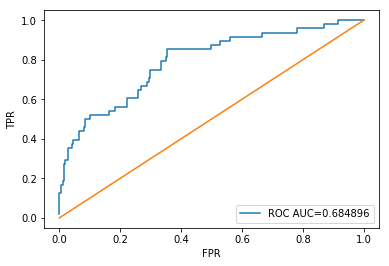

In [82]:
#ROC curve
FPR,TPR,tresholds=roc_curve(y_test,logit1.predict_proba(x_test)[:,1])
plt.plot(FPR,TPR,label="ROC AUC=%f"%roc_auc_score(y_test,y_pred))
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

## as we see our model is high bias and high variance

In [23]:
### lets create dummies from object variables and final data
df_dummies=pd.get_dummies(df_object,prefix=df_object.columns,drop_first=True)
data2=corrected1.join(df_dummies)
Y2=data2.Attrition_Yes
X2=data2.drop("Attrition_Yes",axis=1)
grid2=GridSearchCV(LogisticRegression(random_state=42,class_weight="balanced"),param_grid={"C":np.linspace(0.0001,1,25),"penalty":
                                                                                                ["l1","l2"]},scoring="roc_auc",cv=5,n_jobs=-1)
grid2.fit(X2,Y2)
params=list(grid2.best_params_.values())
C,Penalty=params
x_train,x_test,y_train,y_test=train_test_split(X2,Y2,test_size=0.25,random_state=42)
logit2=LogisticRegression(random_state=42,C=C,penalty=Penalty,class_weight='balanced').fit(x_train,y_train)
train_score=logit2.score(x_train,y_train)
test_score=logit2.score(x_test,y_test)
print(grid2.best_params_)
print("Train score is %s and Test score is%s"%(train_score,test_score))
print("cross_validation score is %s"% (np.mean(cross_val_score(LogisticRegression(random_state=42,C=C,penalty=Penalty,class_weight='balanced'),X2,Y2,cv=5))))
y_pred=logit2.predict(x_test)
y_pred2=logit2.predict(x_train)
print(classification_report(y_test,logit2.predict(x_test)))
print("roc_auc: for test is",roc_auc_score(y_test,y_pred))
print("roc_auc: for train is",roc_auc_score(y_train,y_pred2))
print("average Roc_score is",grid2.best_score_)
print("recall for train",recall_score(y_train,y_pred2))
print("recall for test",recall_score(y_test,y_pred))



C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'C': 0.41672499999999996, 'penalty': 'l2'}
Train score is 0.79491833030853 and Test score is0.7717391304347826


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


cross_validation score is 0.7666437089094907
              precision    recall  f1-score   support

           0       0.94      0.78      0.86       320
           1       0.32      0.69      0.44        48

   micro avg       0.77      0.77      0.77       368
   macro avg       0.63      0.74      0.65       368
weighted avg       0.86      0.77      0.80       368

roc_auc: for test is 0.7359375
roc_auc: for train is 0.7986114733102685
average Roc_score is 0.8311781269587531
recall for train 0.8042328042328042
recall for test 0.6875


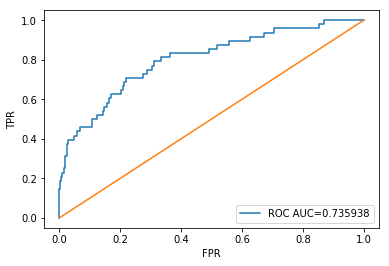

In [24]:
#ROC curve
FPR,TPR,tresholds=roc_curve(y_test,logit2.predict_proba(x_test)[:,1])
plt.plot(FPR,TPR,label="ROC AUC=%f"%roc_auc_score(y_test,y_pred))
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

## From the result we can say that our data cleaning did  positive affect on model, it increase recall and roc score, but however it is still bias and did not reach benchmark.


# Decision tree
<h3>For decision tree we do not have to drop correlated variables so lets add them to corrected_dataframe

In [85]:
data3=corrected.join(df_dummies)##corrected dataframe is different from corrected1 it include correleted variables
Y3=data3.Attrition_Yes
X3=data3.drop("Attrition_Yes",axis=1)
grid3=GridSearchCV(DecisionTreeClassifier(random_state=42,class_weight="balanced"),
             param_grid={"max_depth":range(10,50),
                         "min_samples_leaf":range(40,150,10),
                         },scoring="roc_auc",cv=5,n_jobs=-1).fit(X3,Y3)
params=list(grid3.best_params_.values())
depth,leafs=params
x_train,x_test,y_train,y_test=train_test_split(X3,Y3,test_size=0.25,random_state=42)
tree=DecisionTreeClassifier(random_state=42,class_weight="balanced",max_depth=depth,min_samples_leaf=leafs).fit(x_train,y_train)
train_score=tree.score(x_train,y_train)
test_score=tree.score(x_test,y_test)
print(grid3.best_params_)
print("Train score is %s and Test score is%s"%(train_score,test_score))
print("cross_validation score is %s"% (np.mean(cross_val_score(DecisionTreeClassifier(random_state=42,class_weight="balanced",max_depth=depth,min_samples_leaf=leafs),X3,Y3,cv=5))))
y_pred=tree.predict(x_test)
y_pred2=tree.predict(x_train)
print(classification_report(y_test,tree.predict(x_test)))
print("roc_auc: for test is",roc_auc_score(y_test,y_pred))
print("roc_auc: for train is",roc_auc_score(y_train,y_pred2))
print("average Roc_score is",grid3.best_score_)
print("recall for train",recall_score(y_train,y_pred2))
print("recall for test",recall_score(y_test,y_pred))




{'max_depth': 10, 'min_samples_leaf': 50}
Train score is 0.7522686025408348 and Test score is0.7336956521739131
cross_validation score is 0.7238532041497111
             precision    recall  f1-score   support

          0       0.93      0.75      0.83       320
          1       0.28      0.65      0.39        48

avg / total       0.85      0.73      0.77       368

roc_auc: for test is 0.6963541666666667
roc_auc: for train is 0.7581871497534148
average Roc_score is 0.7405524917972683
recall for train 0.7671957671957672
recall for test 0.6458333333333334


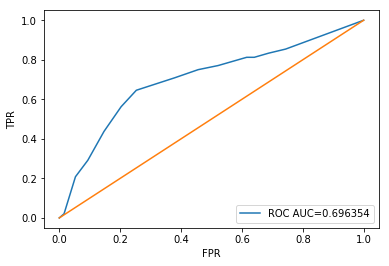

In [86]:
#ROC curve
FPR,TPR,tresholds=roc_curve(y_test,tree.predict_proba(x_test)[:,1])
plt.plot(FPR,TPR,label="ROC AUC=%f"%roc_auc_score(y_test,y_pred))
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [75]:
data4=corrected1.join(df_object)
data4.Attrition=data4.Attrition.apply(lambda x:1 if x=="Yes" else 0 )
#let's get formula for logistic regression
formula="Attrition~"+"+".join(data4.drop("Attrition",axis=1).columns)
logit1=Logit.from_formula(formula=formula,data=data4).fit()
logit1.summary()

         Current function value: 0.294841
         Iterations: 35


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1427
Method:                           MLE   Df Model:                           42
Date:                Mon, 26 Nov 2018   Pseudo R-squ.:                  0.3325
Time:                        21:34:17   Log-Likelihood:                -433.42
converged:                      False   LL-Null:                       -649.29
                                        LLR p-value:                 3.860e-66
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              -11.9297   1193.658     -0.010      0.992   -2351.456    2327.597
BusinessTravel[T.Travel_Frequently]      1.8964      0.413      4.596      0.000       1.088       2.705
BusinessTravel[T.Travel_Rarely]          1.0033      0.380      2.640      0.008       0.258       1.748
Department[T.Research & Development]    13.7624   1193.657      0.012      0.991   -2325.762    2353.287
Department[T.Sales]                     13.6448   1193.657      0.011      0.991   -2325.880    2353.170
EducationField[T.Life Sciences]         -0.7292      0.800     -0.911      0.362      -2.297       0.839
EducationField[T.Marketing]             -0.3465      0.849     -0.408      0.683      -2.010       1.317
EducationField[T.Medical]               -0.7918      0.800     -0.990      0.322      -2.360       0.777
EducationField[T.Other]                 -0.8720      0.860     -1.013      0.311      -2.559       0.815
EducationField[T.Technical Degree]       0.1332      0.818      0.163      0.871      -1.470       1.737
Gender[T.Male]                           0.4108      0.184      2.231      0.026       0.050       0.772
JobRole[T.Human Resources]              15.1622   1193.657      0.013      0.990   -2324.363    2354.687
JobRole[T.Laboratory Technician]         1.5644      0.471      3.323      0.001       0.642       2.487
JobRole[T.Manager]                       0.3168      0.869      0.365      0.715      -1.386       2.019
JobRole[T.Manufacturing Director]        0.1438      0.533      0.270      0.787      -0.900       1.188
JobRole[T.Research Director]            -1.1078      0.948     -1.169      0.242      -2.965       0.750
JobRole[T.Research Scientist]            0.6635      0.477      1.391      0.164      -0.271       1.598
JobRole[T.Sales Executive]               1.1004      1.121      0.982      0.326      -1.096       3.297
JobRole[T.Sales Representative]          2.1879      1.164      1.880      0.060      -0.093       4.469
MaritalStatus[T.Married]                 0.2643      0.265      0.998      0.318      -0.255       0.784
MaritalStatus[T.Single]                  1.0913      0.343      3.186      0.001       0.420       1.763
OverTime[T.Yes]                          1.9807      0.193     10.255      0.000       1.602       2.359
Age                                     -0.0291      0.013     -2.175      0.030      -0.055      -0.003
DailyRate                               -0.0003      0.000     -1.340      0.180      -0.001       0.000
DistanceFromHome                         0.0444      0.011      4.153      0.000       0.023       0.065
Education                                0.0085      0.087      0.097      0.923      -0.163       0.180
EnvironmentSatisfaction                 -0.4271      0.082     -5.188      0.000      -0.588      -0.266
HourlyRate                               0.0016      0.004      0.358      0.721      -0.00

In [76]:
log_summary=pd.read_html(logit1.summary().tables[1].as_html(),header=0)[0]
log_summary[log_summary["P>|z|"]<0.05]##here are vairables that are signidicant that affect an employee churn 
# if we state alpha 0.05

C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


Unnamed: 0    coef  std err       z  P>|z|  \
1   BusinessTravel[T.Travel_Frequently]  1.8964    0.413   4.596  0.000   
2       BusinessTravel[T.Travel_Rarely]  1.0033    0.380   2.640  0.008   
10                       Gender[T.Male]  0.4108    0.184   2.231  0.026   
12     JobRole[T.Laboratory Technician]  1.5644    0.471   3.323  0.001   
20              MaritalStatus[T.Single]  1.0913    0.343   3.186  0.001   
21                      OverTime[T.Yes]  1.9807    0.193  10.255  0.000   
22                                  Age -0.0291    0.013  -2.175  0.030   
24                     DistanceFromHome  0.0444    0.011   4.153  0.000   
26              EnvironmentSatisfaction -0.4271    0.082  -5.188  0.000   
28                       JobInvolvement -0.5497    0.122  -4.517  0.000   
29                      JobSatisfaction -0.3964    0.081  -4.924  0.000   
32                   NumCompaniesWorked  0.1897    0.040   4.781  0.000   
35             RelationshipSatisfaction -0.2517    0.082  -3.064  0.002   
37                    TotalWorkingYears -0.0618    0.027  -2.260  0.024   
38                TrainingTimesLastYear -0.1695    0.083  -2.046  0.041   
39                      WorkLifeBalance -0.3799    0.123  -3.080  0.002   
40                   YearsInCurrentRole -0.1207    0.045  -2.674  0.007   
41              YearsSinceLastPromotion  0.2203    0.047   4.732  0.000   

    [0.025  0.975]  
1    1.088   2.705  
2    0.258   1.748  
10   0.050   0.772  
12   0.642   2.487  
20   0.420   1.763  
21   1.602   2.359  
22  -0.055  -0.003  
24   0.023   0.065  
26  -0.588  -0.266  
28  -0.788  -0.311  
29  -0.554  -0.239  
32   0.112   0.268  
35  -0.413  -0.091  
37  -0.115  -0.008  
38  -0.332  -0.007  
39  -0.622  -0.138  
40  -0.209  -0.032  
41   0.129   0.312

In [34]:
#we should calculate marginal effects to be able to interpret change of y variable
logit1.get_margeff().summary()
log_summary=pd.read_html(logit1.get_margeff().summary().tables[1].as_html(),header=0)[0]
log_summary=log_summary.rename(columns={"Unnamed: 0":"Parameter"})##making summary as dataframe to manipulate easily
log_summary[log_summary["P>|z|"]<0.05]

Parameter   dy/dx  std err       z  P>|z|  \
0   BusinessTravel[T.Travel_Frequently]  0.1714    0.036   4.695  0.000   
1       BusinessTravel[T.Travel_Rarely]  0.0907    0.034   2.657  0.008   
9                        Gender[T.Male]  0.0371    0.017   2.243  0.025   
11     JobRole[T.Laboratory Technician]  0.1414    0.042   3.363  0.001   
19              MaritalStatus[T.Single]  0.0986    0.031   3.225  0.001   
20                      OverTime[T.Yes]  0.1790    0.015  11.787  0.000   
21                                  Age -0.0026    0.001  -2.188  0.029   
23                     DistanceFromHome  0.0040    0.001   4.230  0.000   
25              EnvironmentSatisfaction -0.0386    0.007  -5.357  0.000   
27                       JobInvolvement -0.0497    0.011  -4.640  0.000   
28                      JobSatisfaction -0.0358    0.007  -5.067  0.000   
31                   NumCompaniesWorked  0.0171    0.003   4.912  0.000   
34             RelationshipSatisfaction -0.0227    0.007  -3.098  0.002   
36                    TotalWorkingYears -0.0056    0.002  -2.273  0.023   
37                TrainingTimesLastYear -0.0153    0.007  -2.056  0.040   
38                      WorkLifeBalance -0.0343    0.011  -3.106  0.002   
39                   YearsInCurrentRole -0.0109    0.004  -2.692  0.007   
40              YearsSinceLastPromotion  0.0199    0.004   4.844  0.000   

    [0.025  0.975]  
0    0.100   0.243  
1    0.024   0.158  
9    0.005   0.070  
11   0.059   0.224  
19   0.039   0.159  
20   0.149   0.209  
21  -0.005  -0.000  
23   0.002   0.006  
25  -0.053  -0.024  
27  -0.071  -0.029  
28  -0.050  -0.022  
31   0.010   0.024  
34  -0.037  -0.008  
36  -0.010  -0.001  
37  -0.030  -0.001  
38  -0.056  -0.013  
39  -0.019  -0.003  
40   0.012   0.028

 If p<=0.05,then there is a statistically significant relationship between affairs and corresponding variable.
 
Interpreting for continuous variable. So, incremental  incraese in age will decrease the likelihood(probability) of being in Attrition group on average by 0.02%(0.0026*100%) if other factors held constant.

For categgorical variables we say for example,being a male will increase probability of  being in Attrition group compared to females on on average by 3%(0.0371*100%) if other factors held constant.


In [35]:
importances=tree.feature_importances_
importances=pd.DataFrame(data=importances, index=X3.columns, columns=['importances']).sort_values(by=['importances'],ascending=False)
importances[:12]

importances
OverTime_Yes                   0.308649
TotalWorkingYears              0.153284
JobLevel                       0.125901
MonthlyIncome                  0.082056
JobRole_Sales Executive        0.075464
StockOptionLevel               0.062805
JobSatisfaction                0.052906
YearsInCurrentRole             0.038450
Age                            0.024675
TrainingTimesLastYear          0.023994
NumCompaniesWorked             0.022082
JobRole_Research Scientist     0.020789

Here are important features for decision tree classifier

In [87]:
data3=corrected.join(df_dummies)##corrected dataframe is different from corrected1 it include correleted variables
Y3=data3.Attrition_Yes
X3=data3.drop("Attrition_Yes",axis=1)
grid4=GridSearchCV(RandomForestClassifier(random_state=42,class_weight="balanced"),
             param_grid={"max_depth":range(10,50),
                         "min_samples_leaf":range(40,150,10),
                       "n_estimators":range(2,20)  },scoring="roc_auc",cv=5,n_jobs=-1).fit(X3,Y3)
params=list(grid4.best_params_.values())
depth,leafs,n_estimators=params
x_train,x_test,y_train,y_test=train_test_split(X3,Y3,test_size=0.25,random_state=42)
forest=RandomForestClassifier(random_state=42,class_weight="balanced",max_depth=depth,min_samples_leaf=leafs,n_estimators=n_estimators).fit(x_train,y_train)
train_score=forest.score(x_train,y_train)
test_score=forest.score(x_test,y_test)
print(grid4.best_params_)
print("Train score is %s and Test score is%s"%(train_score,test_score))
print("cross_validation score is %s"% (np.mean(cross_val_score(RandomForestClassifier(random_state=42,class_weight="balanced",max_depth=depth,min_samples_leaf=leafs,n_estimators=n_estimators),X3,Y3,cv=5))))
y_pred=forest.predict(x_test)
y_pred2=forest.predict(x_train)
print(classification_report(y_test,forest.predict(x_test)))
print("roc_auc: for test is",roc_auc_score(y_test,y_pred))
print("roc_auc: for train is",roc_auc_score(y_train,y_pred2))
print("average Roc_score is",grid4.best_score_)
print("recall for train",recall_score(y_train,y_pred2))
print("recall for test",recall_score(y_test,y_pred))

{'max_depth': 10, 'min_samples_leaf': 40, 'n_estimators': 12}
Train score is 0.8139745916515426 and Test score is0.7880434782608695
cross_validation score is 0.7639410527906424
             precision    recall  f1-score   support

          0       0.92      0.83      0.87       320
          1       0.31      0.50      0.38        48

avg / total       0.84      0.79      0.81       368

roc_auc: for test is 0.6656250000000001
roc_auc: for train is 0.7849377307208633
average Roc_score is 0.7741663423551151
recall for train 0.7407407407407407
recall for test 0.5


In [45]:
viz=pd.DataFrame(logit2.coef_,columns=X2.columns).T

In [78]:
log_summary[log_summary["P>|z|"]<0.05]["Unnamed: 0"]

1     BusinessTravel[T.Travel_Frequently]
2         BusinessTravel[T.Travel_Rarely]
10                         Gender[T.Male]
12       JobRole[T.Laboratory Technician]
20                MaritalStatus[T.Single]
21                        OverTime[T.Yes]
22                                    Age
24                       DistanceFromHome
26                EnvironmentSatisfaction
28                         JobInvolvement
29                        JobSatisfaction
32                     NumCompaniesWorked
35               RelationshipSatisfaction
37                      TotalWorkingYears
38                  TrainingTimesLastYear
39                        WorkLifeBalance
40                     YearsInCurrentRole
41                YearsSinceLastPromotion
Name: Unnamed: 0, dtype: object

In [80]:
viz=viz.loc[["Age",'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely',"Gender_Male","JobRole_Laboratory Technician",'MaritalStatus_Married',
       'MaritalStatus_Single','OverTime_Yes','DistanceFromHome', 'EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',
'NumCompaniesWorked',
'RelationshipSatisfaction',
'TotalWorkingYears',
'TrainingTimesLastYear',
'WorkLifeBalance',
'YearsInCurrentRole',
'YearsSinceLastPromotion'],:]

In [85]:
viz=viz.apply(abs)

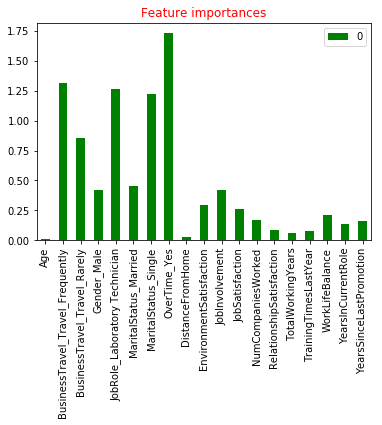

In [102]:
viz.plot(kind="bar",color='green')
plt.title("Feature importances",color='red')
plt.show()

In [15]:
!pip install 

  Using cached https://files.pythonhosted.org/packages/22/85/25586a31f38d876f377f725ee3ce54d0e222485264c2621463365cc7f55a/rpy2-3.0.2.tar.gz


    ERROR: Complete output from command python setup.py egg_info:
    ERROR: Traceback (most recent call last):
      File "C:\ProgramData\Anaconda3\lib\site-packages\cffi\cparser.py", line 276, in _parse
        ast = _get_parser().parse(fullcsource)
      File "C:\ProgramData\Anaconda3\lib\site-packages\pycparser\c_parser.py", line 152, in parse
        debug=debuglevel)
      File "C:\ProgramData\Anaconda3\lib\site-packages\pycparser\ply\yacc.py", line 331, in parse
        return self.parseopt_notrack(input, lexer, debug, tracking, tokenfunc)
      File "C:\ProgramData\Anaconda3\lib\site-packages\pycparser\ply\yacc.py", line 1199, in parseopt_notrack
        tok = call_errorfunc(self.errorfunc, errtoken, self)
      File "C:\ProgramData\Anaconda3\lib\site-packages\pycparser\ply\yacc.py", line 193, in call_errorfunc
        r = errorfunc(token)
      File "C:\ProgramData\Anaconda3\lib\site-packages\pycparser\c_parser.py", line 1848, in p_error
        column=self.clex.find_tok_colum

In [ ]:
!easy_install rpy2